In [1]:
import sys
import os
from datetime import datetime
import mlflow
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import mlflow
import os
import json
import matplotlib.pyplot as plt

sys.path.insert(1, '../')


from src.utils import my_yf_download, get_sp500_tickers
from src.models.predictive_sma20_crossover_model import PredictiveSma20CrossoverModel
from src.models.predictive_macd_crossover_model import PredictiveMacdCrossoverModel
from src.models.bollinger_bands_metalabel import BollingerBandsMetalabel
from src.models.rolling_precision_recall_model import RollingPrecisionRecallModel
from src.data_processing import check_if_today_starts_with_vertical_green_overlay
from src.cache_utils import load_model
from src.plotting_utils import (
    plot_candlesticks,
)

In [2]:
today = datetime.today()
today_str = today.strftime('%Y-%m-%d')

end_date = today_str
for ticker in ["MRF.NS"]:
    my_yf_download(ticker, "../cache", end=end_date)

In [3]:
model_names = [
        "RollingPrecisionRecallModel",
        'BollingerBandsMetalabel',
        "PredictiveMacdCrossoverModel",
        "PredictiveSma20CrossoverModel",
    ]
selected_model_class = globals()[model_names[3]]

In [4]:
last_n_days = "30"
train_until = "2019-01-01"

In [5]:
model = selected_model_class("MRF.NS", train_until, data_source="yf")

2024-01-20 10:10:28.125 
  command:

    streamlit run C:\Users\doraemon\anaconda3\envs\rfenv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


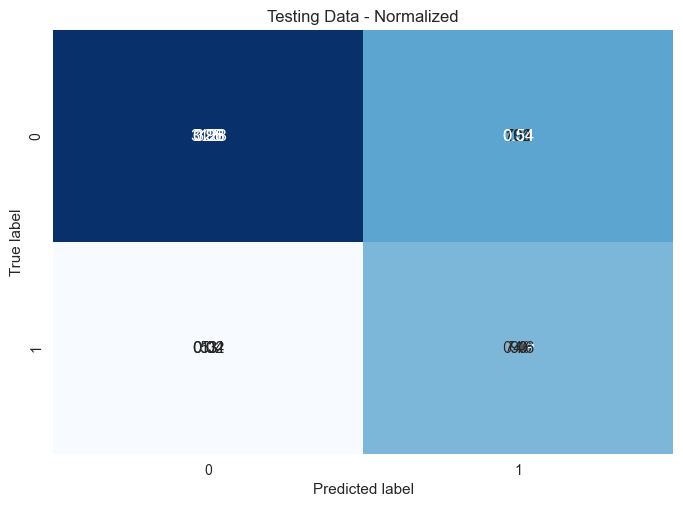

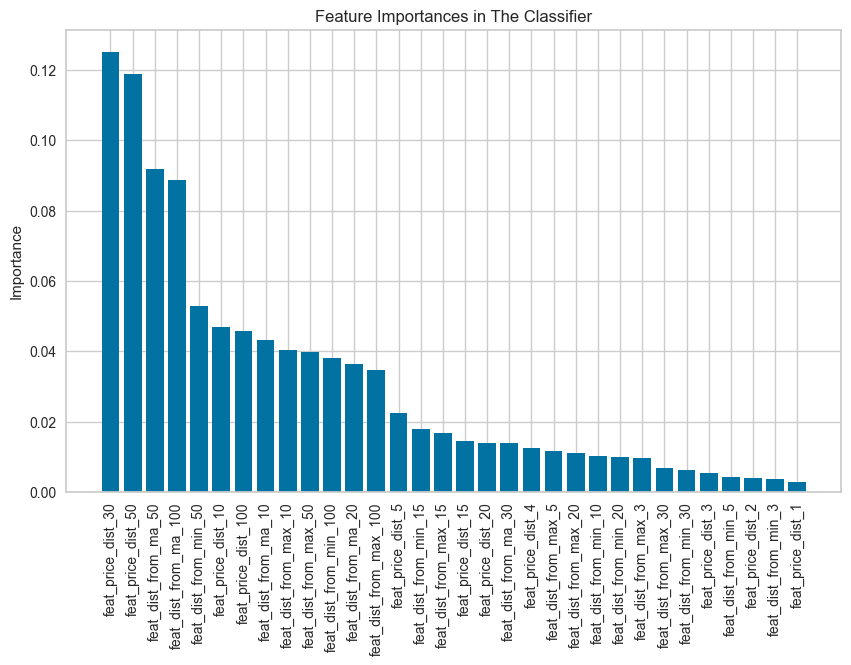

In [6]:
model_results = model.run_train()

In [7]:
model_results

{'train_accuracy': 0.8209366391184573,
 'train_precision': 0.4850455136540962,
 'test_accuracy': 0.7800751879699248,
 'test_precision': 0.4639175257731959,
 'df_test':            Date           Open           High            Low          Close  \
 4819 2021-11-24   76654.546875   77397.851562   76114.148438   76469.546875   
 4820 2021-11-25   76569.546875   76698.000000   75280.601562   75663.398438   
 4821 2021-11-26   75650.000000   75650.000000   74511.000000   75190.351562   
 4822 2021-11-29   74905.000000   75099.953125   73050.000000   73818.250000   
 4823 2021-11-30   73541.000000   75996.000000   73541.000000   74630.796875   
 ...         ...            ...            ...            ...            ...   
 5346 2024-01-09  132000.000000  133100.000000  131202.203125  131692.453125   
 5347 2024-01-10  132099.000000  132199.593750  130210.000000  131828.406250   
 5348 2024-01-11  132459.000000  133625.000000  132002.703125  133368.000000   
 5349 2024-01-12  133868.000000  

In [8]:
df_test = model.run_test("MRF.NS", 30, data_source="yf")

In [9]:
df_test

,Date,Open,High,Low,Close,Adj Close,Volume,feat_dist_from_ma_10,feat_dist_from_ma_20,feat_dist_from_ma_30,...,feat_price_dist_15,feat_price_dist_20,feat_price_dist_30,feat_price_dist_50,feat_price_dist_100,target_ma,VWAP,price_above_ma,pred_prob,pred
0,2023-12-22,119660.000000,120699.953125,117900.046875,119544.296875,119544.296875,12705,0.003206,0.028488,0.047034,...,0.073019,0.073314,0.103335,0.115109,0.167389,116233.022266,41201.333264,False,0.112956,False
1,2023-12-26,120280.000000,120499.000000,119701.000000,120269.351562,120269.351562,2962,0.008259,0.030815,0.049648,...,0.078585,0.079150,0.112799,0.116312,0.172969,116674.079687,41206.076541,False,0.133955,False
2,2023-12-27,120269.351562,121343.898438,120000.000000,121038.546875,121038.546875,4444,0.013403,0.033205,0.052460,...,0.064264,0.085091,0.117667,0.113661,0.175631,117148.659375,41213.261215,False,0.120316,False
3,2023-12-28,121233.000000,126630.601562,121000.000000,125861.351562,125861.351562,13240,0.048448,0.068175,0.088645,...,0.103187,0.121094,0.169307,0.153710,0.218574,117828.399609,41235.951617,False,0.078968,False
4,2023-12-29,126100.000000,130399.351562,125084.648438,129579.250000,129579.250000,17516,0.071368,0.091440,0.114314,...,0.103661,0.160241,0.184676,0.182849,0.263089,118723.212109,41267.269443,False,0.047935,False
5,2024-01-01,129570.000000,130734.351562,129000.000000,129423.546875,129423.546875,9043,0.061881,0.081920,0.106907,...,0.097280,0.161694,0.173390,0.167179,0.209867,119623.924609,41283.400742,False,0.052322,False
6,2024-01-02,129450.000000,130269.601562,127257.101562,129992.296875,129992.296875,8846,0.057375,0.078343,0.105933,...,0.091909,0.165781,0.166109,0.185274,0.167982,120548.207031,41299.276700,False,0.051142,False
7,2024-01-03,129740.000000,130955.000000,129000.000000,130595.851562,130595.851562,7203,0.052175,0.075824,0.105049,...,0.092826,0.148299,0.172410,0.191839,0.206804,121391.507031,41312.287704,False,0.047537,False
8,2024-01-04,130500.000000,131950.000000,130149.000000,131509.750000,131509.750000,6833,0.047561,0.075634,0.106517,...,0.097879,0.152696,0.180155,0.200952,0.221814,122262.551953,41324.753163,False,0.038580,False
9,2024-01-05,131600.000000,133500.046875,131600.000000,132701.250000,132701.250000,8182,0.044468,0.078634,0.109848,...,0.100718,0.130252,0.193381,0.217696,0.246994,123027.187109,41339.872218,False,0.028631,False


In [10]:
df = df_test
df['Date'] = df.index
df = df.reset_index(drop=True)
# Determine the pattern periods to overlay
df_pattern = (
    df[df['pred']]
    .groupby((~df['pred']).cumsum())
    ['Date']
    .agg(['first', 'last'])
)


In [24]:
df_pattern

,first,last
pred,,


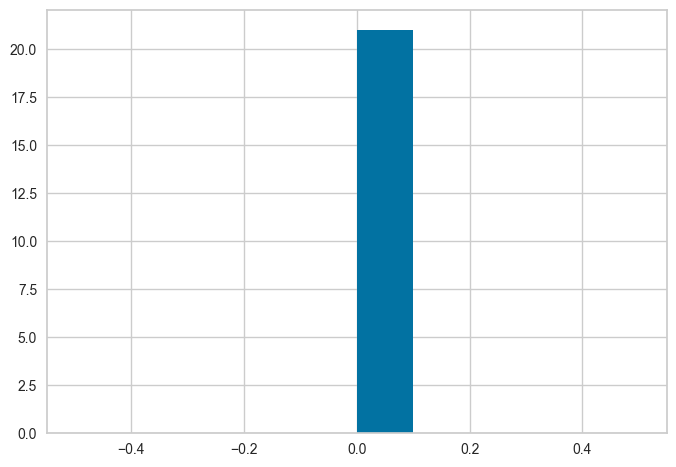

In [21]:
df['price_above_ma'].hist()
plt.show()

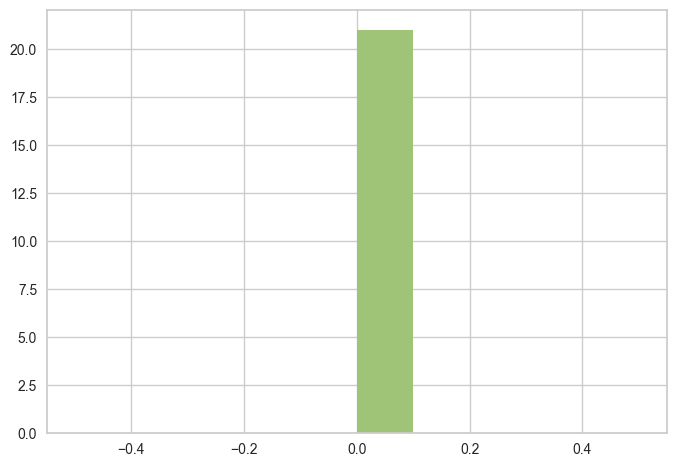

In [23]:
df['pred'].hist()
plt.show()

price never goes above ma for mrf

df['pred'] all are false

so df_pattern is empty

so mrf doesnt work with this strategy